### Oleksiy Anokhin (August 2, 2020)

### Starbucks App Customer Rewards Program 

### MSCA 31008 | Data Mining Principles | Professor U. Pamuksuz | Team Project

This EDA is the continious process of data analysis after the dataset was cleaned and aggregated. The goal of this EDA is to explore all data together, trying to find additional insights for modelling.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

In [4]:
# Read initial non-standartized data
starbucks = pd.read_csv("starbucks.csv")

# Print
starbucks.head()

C:\Users\oleks\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,customer_id,offer_id,offer_received,received_time,offer_viewed,viewed_time,time_viewed_received,offer_completed,completed_time,time_completed_received,time_completed_viewed,transaction,transaction_time,amount,total_reward,age,income,male,membership_days,reward_each_time,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,60.0,60.0,54.0,1.0,60.0,16.06,2.0,45,62000.0,0,608,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,1,408.0,1.0,432.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,71,56000.0,1,158,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,1,252.0,1.0,273.0,21.0,1.0,393.0,141.0,120.0,1.0,393.0,14.00,4.0,71,73000.0,1,268,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,6.0,6.0,0.0,1.0,6.0,20.98,2.0,69,83000.0,0,1040,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,1,168.0,1.0,168.0,0.0,1.0,168.0,0.0,0.0,1.0,168.0,15.16,2.0,59,93000.0,0,329,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Drop id variables
starbucks = starbucks.drop(['Unnamed: 0', 'customer_id', 'offer_id'], axis = 1)

In [5]:
# Print columns types
starbucks.dtypes

Unnamed: 0                   int64
customer_id                 object
offer_id                    object
offer_received               int64
received_time              float64
offer_viewed               float64
viewed_time                float64
time_viewed_received       float64
offer_completed            float64
completed_time             float64
time_completed_received    float64
time_completed_viewed      float64
transaction                float64
transaction_time           float64
amount                     float64
total_reward               float64
age                          int64
income                     float64
male                         int64
membership_days              int64
reward_each_time           float64
difficulty                 float64
duration                   float64
email                      float64
mobile                     float64
social                     float64
web                        float64
bogo                       float64
discount            

In [6]:
# Print
starbucks.head()

,Unnamed: 0,customer_id,offer_id,offer_received,received_time,offer_viewed,viewed_time,time_viewed_received,offer_completed,completed_time,time_completed_received,time_completed_viewed,transaction,transaction_time,amount,total_reward,age,income,male,membership_days,reward_each_time,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,60.0,60.0,54.0,1.0,60.0,16.06,2.0,45,62000.0,0,608,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,1,408.0,1.0,432.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,71,56000.0,1,158,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,1,252.0,1.0,273.0,21.0,1.0,393.0,141.0,120.0,1.0,393.0,14.00,4.0,71,73000.0,1,268,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,6.0,6.0,0.0,1.0,6.0,20.98,2.0,69,83000.0,0,1040,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,1,168.0,1.0,168.0,0.0,1.0,168.0,0.0,0.0,1.0,168.0,15.16,2.0,59,93000.0,0,329,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


<font color='red'>**We have problems with the following columns (negative values):**</font>
    
- time_viewed_received
- time_completed_received
- time_completed_viewed

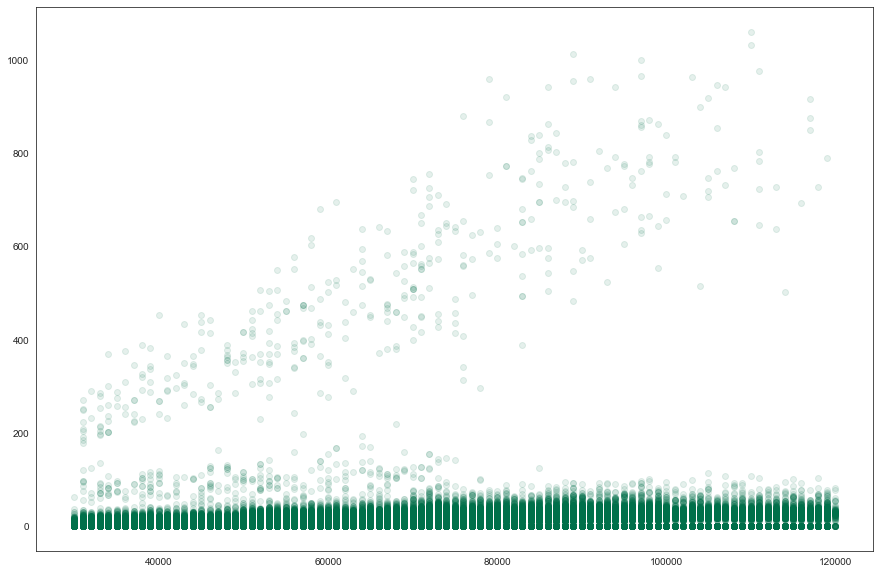

In [7]:
# Analyze correlation between income and amount spent
plt.scatter(starbucks.income, starbucks.amount, alpha = 0.1, color = '#00704A')

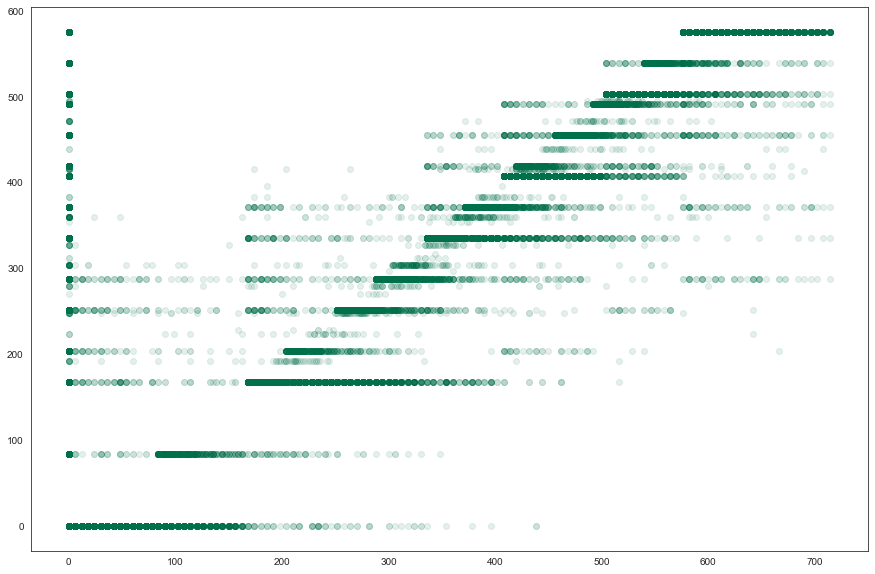

In [8]:
# Analyze correlation between times
plt.scatter(starbucks.viewed_time, starbucks.received_time, alpha = 0.1, color = '#00704A')

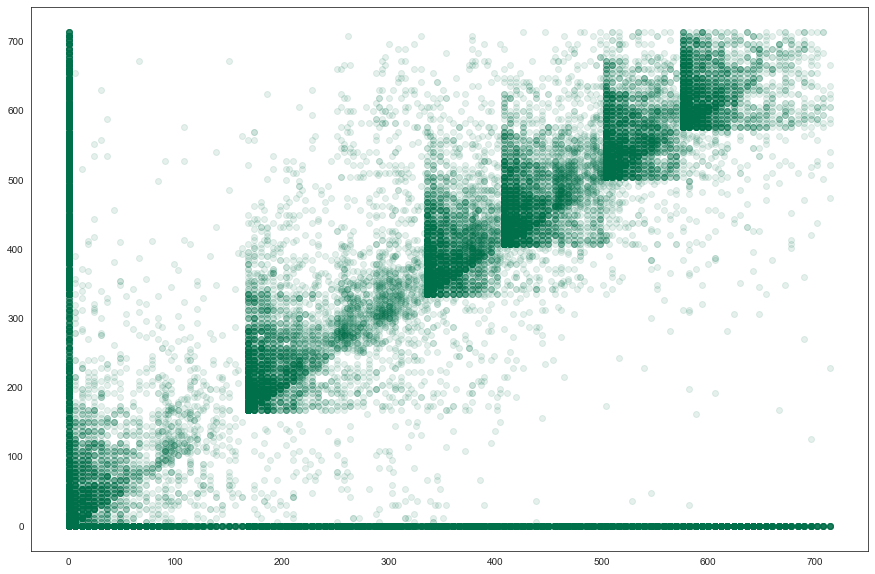

In [9]:
# Analyze correlation between times
plt.scatter(starbucks.viewed_time, starbucks.completed_time, alpha = 0.1, color = '#00704A')

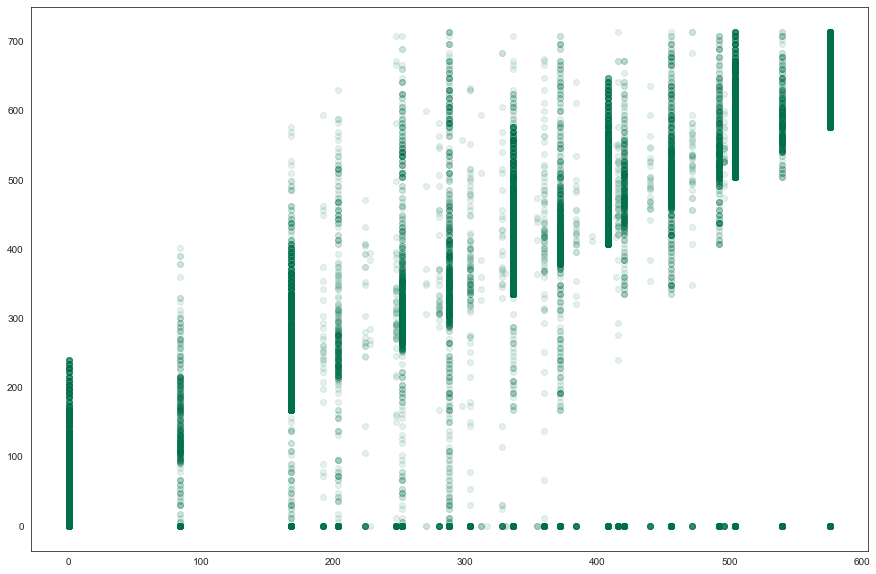

In [10]:
# Analyze correlation between times
plt.scatter(starbucks.received_time, starbucks.completed_time, alpha = 0.1, color = '#00704A')

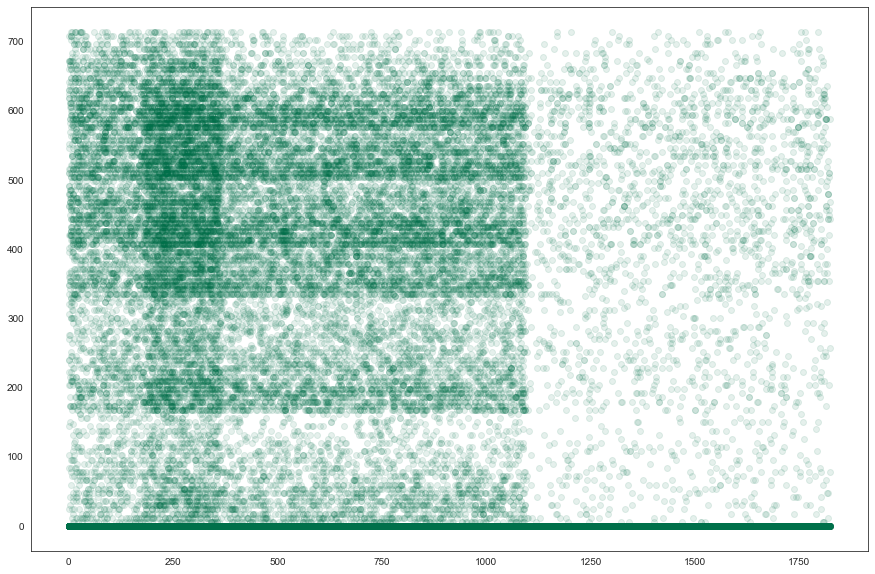

In [12]:
# Analyze correlation membership and completed time
plt.scatter(starbucks.membership_days, starbucks.completed_time, alpha = 0.1, color = '#00704A')

In [13]:
# Calculate offers received in the dataset
starbucks.offer_received.value_counts()

0    93055
1    54453
Name: offer_received, dtype: int64

In [14]:
# Calculate offers viewed in the dataset
starbucks.offer_viewed.value_counts()

0.0    105673
1.0     41835
Name: offer_viewed, dtype: int64

In [15]:
# Calculate offers completed in the dataset
starbucks.offer_completed.value_counts()

0.0    119995
1.0     27513
Name: offer_completed, dtype: int64

In [16]:
# Calculate transactions in the dataset
starbucks.transaction.value_counts()

1.0    120568
0.0     26940
Name: transaction, dtype: int64

In [17]:
# Create a dataframe of offers
offers = {'Received': [93055, 54453], 'Viewed': [105673, 41835], 
          'Completed': [119995, 27513], 'Transaction': [26940, 120568]}
offers_df = pd.DataFrame(data = offers)
offers_df

,Received,Viewed,Completed,Transaction
0,93055,105673,119995,26940
1,54453,41835,27513,120568


In [18]:
# Calculate males and females in the dataset
starbucks.male.value_counts()

1    89392
0    58116
Name: male, dtype: int64

In [19]:
# Calculate campaigns
print(starbucks.bogo.value_counts())
print(starbucks.discount.value_counts())
print(starbucks.informational.value_counts())

0.0    125749
1.0     21759
Name: bogo, dtype: int64
0.0    125692
1.0     21816
Name: discount, dtype: int64
0.0    136630
1.0     10878
Name: informational, dtype: int64


In [20]:
# Analyze types
types = {'BOGO': [21759], 'Discount': [21816], 'Informational': [10878]}
types_df = pd.DataFrame(data = types)
types_df

,BOGO,Discount,Informational
0,21759,21816,10878


In [21]:
# Calculate channels
print(starbucks.web.value_counts())
print(starbucks.social.value_counts())
print(starbucks.mobile.value_counts())

0.0    103976
1.0     43532
Name: web, dtype: int64
0.0    114872
1.0     32636
Name: social, dtype: int64
0.0    98566
1.0    48942
Name: mobile, dtype: int64


In [22]:
# Analyze channels
channels = {'Web': [43532], 'Social': [32636], 'Mobile': [48942]}
channels_df = pd.DataFrame(data = channels)
channels_df

,Web,Social,Mobile
0,43532,32636,48942
